In [579]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.layers import LSTM, GRU


from itertools import cycle

import matplotlib.pyplot as plt
# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [580]:
gdp = pd.read_csv('/Users/patricia/Downloads/gdp.csv', header=0)
gdp.describe()

,Year,第一产业GDP贡献率,第二产业GDP贡献率,第三产业GDP贡献率,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,...,流通中现金(M0)供应量同比增长率(%),财政收入增长率,居民消费价格指数,商品零售价格指数,工业生产者出厂价格指数,工业生产者购进价格指数,固定资产投资价格指数,全社会固定资产投资,GDP,PGDP
count,56.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01,41.000000
mean,2007.500000,9.075610,50.692683,40.229268,67018.463415,30686.487805,16526.780488,19805.170732,123897.097561,28571.000000,...,14.921951,13.351220,104.912195,103.985366,103.773171,107.714634,105.119512,161921.068049,2.554681e+05,18850.292683
std,16.309506,10.124816,12.218928,10.740862,11094.811017,6035.796236,4748.809811,9283.573646,12865.420655,4067.124826,...,10.453217,8.008312,5.800095,5.715005,6.689171,9.268861,5.253485,220281.269789,3.106919e+05,22165.361428
min,1980.000000,-4.800000,17.700000,19.200000,42361.000000,17715.000000,7707.000000,5532.000000,98705.000000,22259.000000,...,2.900000,-3.900000,98.600000,97.000000,94.600000,92.100000,97.600000,910.900000,4.587600e+03,468.000000
25%,1993.750000,4.100000,43.500000,32.700000,64749.000000,27931.000000,13856.000000,11979.000000,114333.000000,24688.000000,...,8.700000,7.200000,101.800000,100.800000,98.700000,99.300000,101.100000,4753.800000,1.887290e+04,1663.000000
50%,2007.500000,5.200000,50.500000,39.000000,72085.000000,31254.000000,16234.000000,19823.000000,126743.000000,29011.000000,...,11.900000,13.100000,102.700000,102.000000,102.900000,108.100000,105.400000,32917.730000,1.002801e+05,7942.000000
75%,2021.250000,8.700000,59.600000,46.500000,75564.000000,35530.000000,21234.000000,26332.000000,134091.000000,32339.000000,...,19.400000,19.900000,106.400000,105.900000,106.200000,116.000000,108.000000,278121.850000,4.121193e+05,30808.000000
max,2035.000000,40.500000,85.600000,63.500000,76349.000000,39098.000000,23226.000000,35806.000000,141178.000000,34146.000000,...,49.500000,32.400000,124.100000,121.700000,124.000000,135.100000,126.600000,645675.000000,1.015986e+06,72000.000000


In [581]:
import math
gdp['GDP'] = gdp['GDP'].apply(lambda x: math.log(x))
gdp=gdp.dropna(axis=0,how='any')

dataset = gdp.copy()
del dataset['PGDP']
dataset.head()


,Year,第一产业GDP贡献率,第二产业GDP贡献率,第三产业GDP贡献率,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,...,进出口总额,流通中现金(M0)供应量同比增长率(%),财政收入增长率,居民消费价格指数,商品零售价格指数,工业生产者出厂价格指数,工业生产者购进价格指数,固定资产投资价格指数,全社会固定资产投资,GDP
0,1980,-4.8,85.6,19.2,42361.0,29122.0,7707.0,5532.0,98705.0,32384.0,...,570.00,29.3,1.2,107.5,106.0,100.5,116.0,108.0,910.9,8.431112
1,1981,40.5,17.7,41.8,43725.0,29777.0,8003.0,5945.0,100072.0,32384.0,...,735.34,14.5,1.4,102.5,102.4,100.2,116.0,108.0,961.0,8.504270
2,1982,38.6,28.8,32.6,45295.0,30859.0,8346.0,6090.0,101654.0,34146.0,...,771.37,10.8,3.1,102.0,101.9,99.8,116.0,108.0,1230.4,8.589216
3,1983,23.9,43.5,32.7,46436.0,31151.0,8679.0,6606.0,103008.0,32384.0,...,860.15,20.7,12.8,102.0,101.5,99.9,116.0,108.0,1430.1,8.702992
4,1984,25.6,42.7,31.7,48197.0,30868.0,9590.0,7739.0,104357.0,32384.0,...,1201.03,49.5,20.2,102.7,102.8,101.4,116.0,108.0,1832.9,8.892680


In [582]:
values = dataset.values

#保证为float ensure all data is float
values = values.astype('float32')
print(values.shape)

(41, 27)


In [583]:
#归一化 normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled.reshape(-1,1)

array([[0.        ],
       [0.        ],
       [1.        ],
       ...,
       [0.17241383],
       [0.81635964],
       [1.        ]], dtype=float32)

In [584]:
values = scaled

#拿前70%时间长度训练
train_years = int(0.7*len(values))
#划分训练数据和测试数据
train = values[:train_years, :]
test = values[train_years:, :]
#拆分输入输出 split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1].reshape(-1,1)
test_X, test_y = test[:, :-1], test[:, -1].reshape(-1,1)
#reshape输入为LSTM的输入格式 reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print ('train_x.shape', train_X.shape)
print ('train_y.shape', train_y.shape)
print ('test_x.shape', test_X.shape)
print ('test_y.shape',test_y.shape)


train_x.shape (28, 1, 26)
train_y.shape (28, 1)
test_x.shape (13, 1, 26)
test_y.shape (13, 1)


In [585]:
from nbeats_keras.model import NBeatsNet as NBeatsKeras
import warnings
warnings.filterwarnings(action='ignore', message='Setting attributes')

In [586]:
num_samples, time_steps, input_dim, output_dim = 500, 1, 2, 1

# Definition of the model.
model_keras = NBeatsKeras(backcast_length=time_steps, forecast_length=output_dim,
                          stack_types=(NBeatsKeras.GENERIC_BLOCK, 
                                       NBeatsKeras.GENERIC_BLOCK),
                          nb_blocks_per_stack=2, thetas_dim=(4,4), share_weights_in_stack=True,
                          hidden_layer_units=480)

# Definition of the objective function and the optimizer.
model_keras.compile(loss='mae', optimizer='adam')

# Train the model.
print('Keras training...')
m=model_keras.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=256, batch_size=32)

# Save the model for later.
model_keras.save('n_beats_model')

# Predict on the testing set (forecast).
test_size = len(test_X)
predictions_keras_forecast = model_keras.predict(test_X)
np.testing.assert_equal(predictions_keras_forecast.shape, (test_size, model_keras.forecast_length, output_dim))

# Predict on the testing set (backcast).
predictions_keras_backcast = model_keras.predict(test_X, return_backcast=True)
np.testing.assert_equal(predictions_keras_backcast.shape, (test_size, model_keras.backcast_length, output_dim))

# Load the model.
model_keras_2 = NBeatsKeras.load('n_beats_model')

np.testing.assert_almost_equal(predictions_keras_forecast, model_keras_2.predict(test_X))


Keras training...
Epoch 1/256
1/1 [==============================] - 1s 1s/step - loss: 0.4100 - val_loss: 0.1179
Epoch 2/256
1/1 [==============================] - 0s 27ms/step - loss: 0.0647 - val_loss: 0.7433
Epoch 3/256
1/1 [==============================] - 0s 32ms/step - loss: 0.3582 - val_loss: 0.2805
Epoch 4/256
1/1 [==============================] - 0s 32ms/step - loss: 0.1232 - val_loss: 0.3274
Epoch 5/256
1/1 [==============================] - 0s 28ms/step - loss: 0.1683 - val_loss: 0.4251
Epoch 6/256
1/1 [==============================] - 0s 26ms/step - loss: 0.2020 - val_loss: 0.3330
Epoch 7/256
1/1 [==============================] - 0s 31ms/step - loss: 0.1536 - val_loss: 0.1382
Epoch 8/256
1/1 [==============================] - 0s 43ms/step - loss: 0.0738 - val_loss: 0.1318
Epoch 9/256
1/1 [==============================] - 0s 34ms/step - loss: 0.0858 - val_loss: 0.1858
Epoch 10/256
1/1 [==============================] - 0s 30ms/step - loss: 0.1066 - val_loss: 0.0943
Epo

1/1 [==============================] - 0s 27ms/step - loss: 0.0093 - val_loss: 0.0217
Epoch 74/256
1/1 [==============================] - 0s 28ms/step - loss: 0.0106 - val_loss: 0.0197
Epoch 75/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0093 - val_loss: 0.0195
Epoch 76/256
1/1 [==============================] - 0s 26ms/step - loss: 0.0092 - val_loss: 0.0252
Epoch 77/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0092 - val_loss: 0.0240
Epoch 78/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0088 - val_loss: 0.0197
Epoch 79/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0090 - val_loss: 0.0196
Epoch 80/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0088 - val_loss: 0.0204
Epoch 81/256
1/1 [==============================] - 0s 26ms/step - loss: 0.0083 - val_loss: 0.0213
Epoch 82/256
1/1 [==============================] - 0s 26ms/step - loss: 0.0092 - val_loss: 0.0264
Epoch 83/256
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 0.0156 - val_loss: 0.0468
Epoch 156/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - val_loss: 0.0190
Epoch 157/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0109 - val_loss: 0.0295
Epoch 158/256
1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - val_loss: 0.0525
Epoch 159/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0123 - val_loss: 0.0265
Epoch 160/256
1/1 [==============================] - 0s 28ms/step - loss: 0.0063 - val_loss: 0.0257
Epoch 161/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - val_loss: 0.0486
Epoch 162/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0114 - val_loss: 0.0224
Epoch 163/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0078 - val_loss: 0.0162
Epoch 164/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0104 - val_loss: 0.0343
Epoch 165/256


1/1 [==============================] - 0s 24ms/step - loss: 0.0137 - val_loss: 0.0193
Epoch 238/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0061 - val_loss: 0.0578
Epoch 239/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0182 - val_loss: 0.0476
Epoch 240/256
1/1 [==============================] - 0s 30ms/step - loss: 0.0115 - val_loss: 0.0202
Epoch 241/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 242/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0200 - val_loss: 0.0441
Epoch 243/256
1/1 [==============================] - 0s 24ms/step - loss: 0.0093 - val_loss: 0.0470
Epoch 244/256
1/1 [==============================] - 0s 26ms/step - loss: 0.0125 - val_loss: 0.0181
Epoch 245/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0096 - val_loss: 0.0184
Epoch 246/256
1/1 [==============================] - 0s 25ms/step - loss: 0.0098 - val_loss: 0.0332
Epoch 247/256


/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



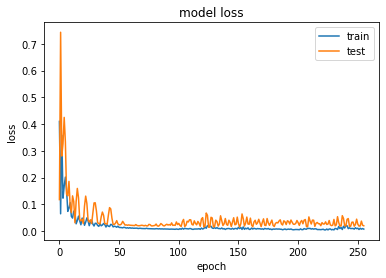

In [587]:
# summarize history for loss
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [588]:
train_X, train_y = train[:, :-1], train[:, -1].reshape(-1,1)
test_X, test_y = test[:, :-1], test[:, -1].reshape(-1,1)

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape)
print(test_X.shape)

(28, 1, 26)
(13, 1, 26)


In [589]:
#进行预测 make a prediction
train_predict = model_keras_2.predict(train_X)
test_predict = model_keras_2.predict(test_X)

train_predict = train_predict.reshape((train_predict.shape[0], 1))
test_predict = test_predict.reshape((test_predict.shape[0], 1))

print(train_predict.shape)
print(test_predict.shape)

#test_X, test_y = test[:, :-1], test[:, -1].reshape(-1,1)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape)
print(test_X.shape)

(28, 1)
(13, 1)
(28, 26)
(13, 26)


In [590]:
#训练数据逆缩放 invert scaling for forecast
train_predict = concatenate((train_X,train_predict), axis=1)
train_predict = scaler.inverse_transform(train_predict)
train_predict = train_predict[:, -1]
train_predict = np.array(train_predict)
#真实数据逆缩放 invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
original_ytrain= concatenate((train_X,train_y), axis=1)
original_ytrain= scaler.inverse_transform(original_ytrain)
original_ytrain = original_ytrain[:, -1]


#预测数据逆缩放 invert scaling for forecast
test_predict = concatenate((test_X,test_predict), axis=1)
test_predict = scaler.inverse_transform(test_predict)
test_predict = test_predict[:, -1]
test_predict = np.array(test_predict)
#真实数据逆缩放 invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
original_ytest= concatenate((test_X,test_y), axis=1)
original_ytest= scaler.inverse_transform(original_ytest)
original_ytest = original_ytest[:, -1]

In [591]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("-------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))


Train data RMSE:  0.061798415948485425
Train data MSE:  0.0038190442
Test data MAE:  0.047354393
-------------------------------------------------------------------------------------
Test data RMSE:  0.12300473960122434
Test data MSE:  0.015130166
Test data MAE:  0.10798491
-------------------------------------------------------------------------------------
Train data R2 score: 0.997633371850073
Test data R2 score: 0.8886130681956534
-------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9984042048454285
Test data explained variance regression score: 0.9010589122772217


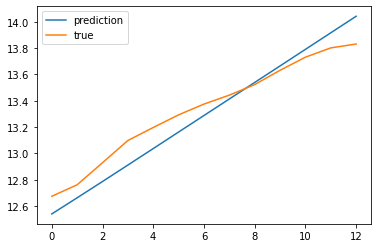

In [592]:
#画出真实数据和预测数据
pyplot.plot(test_predict,label='prediction')
pyplot.plot(original_ytest,label='true')
pyplot.legend()
pyplot.show()


In [593]:
print(train_predict.shape)
print(test_predict.shape)

(28,)
(13,)


In [594]:
train_predict = concatenate((train_X,train_predict.reshape(-1,1)), axis=1)
test_predict = concatenate((test_X,test_predict.reshape(-1,1)), axis=1)
print(train_predict.shape)
print(test_predict.shape)

(28, 27)
(13, 27)


In [595]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict):, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original GDP','Train predicted GDP','Test predicted GDP'])


plotdf = pd.DataFrame({'Year': gdp['Year'],
                       'original': gdp['GDP'],
                      'train_predicted_close': pd.DataFrame(trainPredictPlot[:][:])[26].tolist(),
                      'test_predicted_close':  pd.DataFrame(testPredictPlot[:][:])[26].tolist()})

fig = px.line(plotdf,x=plotdf['Year'], y=[plotdf['original'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'GDP','Year': 'Year'})
fig.update_layout(title_text='Comparision between original vs predicted GDP',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (41, 27)
Test predicted data:  (41, 27)
